In [62]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
# plotly express에 내장되어있는 gapminder 데이터프레임을 사용하겠습니다.
# 기본 자료 로드 
df = px.data.gapminder()
df = pd.DataFrame(df)
df.head(1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4


# 판다스

In [63]:
import pandas as pd
import seaborn as sns

In [64]:
###  판다스 기본 설정 

pd.set_option('display.max_columns', 10)                       # 출력할 열의 최대개수
pd.set_option('display.max_colwidth', 20)                      # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)        # 유니코드 사용 너비 조정


<style>
    /* Jupyter */
    .rendered_html table,
    /* Jupyter Lab*/
    div[data-mime-type="text-markdown"] table {
        margin-left: 0
    }
</style>

## 판다스 자료구조

* 시리즈

* 데이타 프레임 

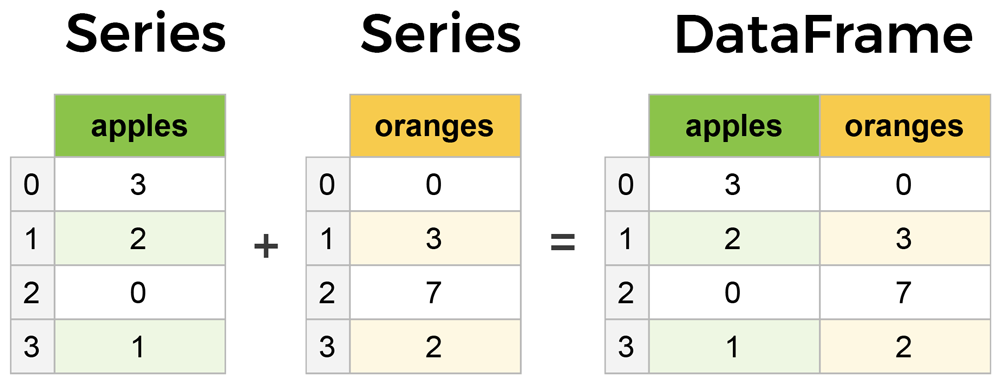

시리즈와 데이터 프레임을 비교해보자.

* 시리즈는 1차원 자료형 이다. 즉 index 에 의해 결정지어지는  data 의 구조이다.  vector
* 데이터 프레임은  2차원 자료형이다. 즉 index 와 columns 에 의해 결정지어지는 data 의 구조이다. matrix

### 시리즈

> * 딕셔너리와 유사한 판다스의 자료 구조 시리즈   
|딕셔너리|시리즈|
|--------|------|
|kye     |index |
|value   |data  |


나중에 딕셔너리와 시리즈 비교한 이미지 찾기


In [65]:
# 딕셔너리 --> 시리즈
a = {'a':1, 'b':2,'c':3}
print(type(a))
b = pd.Series(a)
print(b)
type(b)

<class 'dict'>
a    1
b    2
c    3
dtype: int64


pandas.core.series.Series

#### index

* integer position (default)
* index name or index label (optional)


|value|v0|v1|v2|v3|v4|v5|v6|...|
|-|-|-|-|-|-|-|-|-|
|integer position(default)|0|1|2|3|4|5|6|...|
|index label(optional)|a|b|c|d|e|f|g|...|

In [66]:
b.index #  ['a', 'b', 'c'] 라는 index name(label) 로 되어 있다. 

Index(['a', 'b', 'c'], dtype='object')

In [67]:
b.index = range(3)
print(b.index) # RangeIndex(start=0, stop=3, step=1) --> interger position  정수형으로 된 인덱스 ( 지정하지 않을시 default 값이다. )
b

RangeIndex(start=0, stop=3, step=1)


0    1
1    2
2    3
dtype: int64

#### 원소 선택 (by index)

* Series 객체[인덱스]

In [68]:
b.index = ['a', 'b', 'c']

print(b['b']) # choosed by index label
b[1] # choosed by integer position

2


2

In [69]:
print(b[['b','c']])
b[[0,1]]

b    2
c    3
dtype: int64


a    1
b    2
dtype: int64

### DataFrame 

#### 데이터 프레임이란? (생성)  데이터 프레임 선언


- by Series :시리즈1 + 시리즈2 + 시리즈3 + 시리즈4 = 데이타프레임
-----
- by List : 리스트1 + 리스트2 +... + 컬럼 이름 = 데이타 프레임
- by other dataframe's columns : 컬럼1 + 컬럼2  +...= 데이타 프레임 
- by other dataframe's columns : dfA 컬럼 1 + dfB 컬럼 2   +...= 데이타 프레임

####  by Series(dict) :시리즈1 + 시리즈2 + 시리즈3 + 시리즈4 = 데이타프레임

In [70]:
dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2' : [7,8,9],'c3' : [10,11,12], 'c4':[13,14,15]}
df = pd.DataFrame(dict_data)
sr = pd.Series(dict_data)
print(dict_data)
print("\n")

print(sr)
print(type(sr))
print("\n")

print(df)
print(type(df))

{'c0': [1, 2, 3], 'c1': [4, 5, 6], 'c2': [7, 8, 9], 'c3': [10, 11, 12], 'c4': [13, 14, 15]}


c0       [1, 2, 3]
c1       [4, 5, 6]
c2       [7, 8, 9]
c3    [10, 11, 12]
c4    [13, 14, 15]
dtype: object
<class 'pandas.core.series.Series'>


   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15
<class 'pandas.core.frame.DataFrame'>


#### - by List : 리스트1 + 리스트2 +... + 컬럼 이름 = 데이타 프레임

In [71]:
list_data = [[1,2,3],[4,5,6], [7,8,9],[10,11,12],[13,14,15]]
pd.DataFrame(list_data)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12
4,13,14,15


In [72]:
list_data1 = [1,2,3]
list_data2 = [4,5,6]
list_data3 = [7,8,9]
list_data4 = [10,11,12]
list_data5 = [13,14,15]
pd.DataFrame([list_data1,list_data2,list_data3,list_data4])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In [73]:
pd.DataFrame([list_data1,list_data2,list_data3,list_data4]).T

,0,1,2,3
0,1,4,7,10
1,2,5,8,11
2,3,6,9,12


#### - by other dataframe's columns : 컬럼1 + 컬럼2  +...= 데이타 프레임 

In [74]:
df1 = pd.DataFrame(np.random.randn(5,3), index=pd.date_range('01/02/2014',periods=5,freq='D'), columns=['a','b','c'] )
df2 = pd.DataFrame(np.random.randn(8,3), index=pd.date_range('01/01/2014',periods=8,freq='D'), columns=['a','b','c'] )
pd.DataFrame([df1['a'],df2['b']])


,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08
a,NaN,0.809055,3.151030,-0.054462,-1.136878,0.863586,NaN,NaN
b,1.385102,-1.616549,-0.558269,-0.378489,0.681848,-0.431550,-0.293112,0.231338


In [75]:
df1 = pd.DataFrame(np.random.randn(5,3), index=pd.date_range('01/02/2014',periods=5,freq='D'), columns=['a','b','c'] )
df2 = pd.DataFrame(np.random.randn(8,3), index=pd.date_range('01/01/2014',periods=8,freq='D'), columns=['a','b','c'] )
pd.DataFrame(df1[['a','b']])             

,a,b
2014-01-02,0.627221,1.182189
2014-01-03,2.149267,0.146786
2014-01-04,-0.039014,0.313833
2014-01-05,-0.348219,1.945230
2014-01-06,0.159713,0.108841


In [76]:
df1[['a','b']]

,a,b
2014-01-02,0.627221,1.182189
2014-01-03,2.149267,0.146786
2014-01-04,-0.039014,0.313833
2014-01-05,-0.348219,1.945230
2014-01-06,0.159713,0.108841


#### - by other dataframe's columns : dfA 컬럼 1 + dfB 컬럼 2   +...= 데이타 프레임

In [77]:
pd.DataFrame([df1['a'],df2['b']]).T

,a,b
2014-01-01,NaN,0.235947
2014-01-02,0.627221,0.491499
2014-01-03,2.149267,0.193773
2014-01-04,-0.039014,-1.261295
2014-01-05,-0.348219,1.154493
2014-01-06,0.159713,1.008821
2014-01-07,NaN,-0.349498
2014-01-08,NaN,-0.265164


### 데이터 프레임 만드는 법 ( 설정 )


#### 행(row) index / columns 설정

>pd.DataFrame( 2차원배열, index = 행 인덱스 배열(default=integer position), 
                          columns= 열 이름 배열 )

In [78]:
df = pd.DataFrame([[14,'남','목동'],[16,'여','성수동']]
                  , index = ['김씨','박씨']
                  , columns=['나이','성별','거주지'])

print(df.index)
print(df.columns)
df



Index(['김씨', '박씨'], dtype='object')
Index(['나이', '성별', '거주지'], dtype='object')


,나이,성별,거주지
김씨,14,남,목동
박씨,16,여,성수동


#### 새로운 인덱스와 컬럼명 지정해주기 ( by df.index, df.columns)

In [79]:
# 인덱스 바꾸기
print(df.index)
df.index = ['김철수','박미정']
df.index

Index(['김씨', '박씨'], dtype='object')


Index(['김철수', '박미정'], dtype='object')

In [80]:
# 컬럼명 지정해주기
print(df.columns)
df.columns = ['age','sex','address']
df.columns

Index(['나이', '성별', '거주지'], dtype='object')


Index(['age', 'sex', 'address'], dtype='object')

#### by df.rename
df.renaem( 바꿀것, inplace= (True 직접 바꾼다., False 원본은 그대로 놓아 둔다.) )

In [81]:
df

,age,sex,address
김철수,14,남,목동
박미정,16,여,성수동


In [82]:
df.rename(columns={'age':'연령','sex':'남녀'})
print(df)
df.rename(columns={'age':'연령','sex':'남녀'},index={'김철수':'Kim'},inplace=True)
df

        age sex address
김철수   14  남    목동
박미정   16  여  성수동


,연령,남녀,address
Kim,14,남,목동
박미정,16,여,성수동


In [83]:

df.columns

Index(['연령', '남녀', 'address'], dtype='object')

#### 행/열 삭제

> * df.drop( 행 인덱스 or 배열, axis=0(default) ) 
> * df.drop( 행 인덱스 or 배열, axis=1)
> * inplace= True or False

In [84]:
df

,연령,남녀,address
Kim,14,남,목동
박미정,16,여,성수동


In [85]:
df.drop('남녀',axis=1, inplace=True)
df

,연령,address
Kim,14,목동
박미정,16,성수동


#### 행 선택, 열 선택, 원소 선택


>|구분|loc|iloc|
>|---|----|----|
>|탐색대상| 인덱스이름(index label) | 정수형 인덱스(integer position)|
>|범위지정| 가능(범위의 끝 포함)| 기능(범위의 끝 제외 )|


> * df.컬럼명 : df의 컬럼 선택 

















In [86]:
exam_data = {'수학':[90,80,70],'영어':[45,34,55],'음악':[85,78,87],'체육':[100,85,90]}
df = pd.DataFrame(exam_data, index=['서준','우현','인아'])
df

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85
인아,70,55,87,90


##### 열선택

In [87]:
df['영어']

서준    45
우현    34
인아    55
Name: 영어, dtype: int64

In [88]:
df.영어

서준    45
우현    34
인아    55
Name: 영어, dtype: int64

##### loc

In [89]:
df.loc['서준']

수학     90
영어     45
음악     85
체육    100
Name: 서준, dtype: int64

In [90]:
df.loc[['서준','우현']]

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85


In [91]:
df.loc[:,'영어']

서준    45
우현    34
인아    55
Name: 영어, dtype: int64

In [92]:
df.loc[:,['수학','음악']]

,수학,음악
서준,90,85
우현,80,78
인아,70,87


In [93]:
df.loc[:,'수학':'음악']

,수학,영어,음악
서준,90,45,85
우현,80,34,78
인아,70,55,87


In [94]:
df.loc['서준','영어']

45

In [95]:
df.loc['서준':'우현','수학':'영어']

,수학,영어
서준,90,45
우현,80,34


##### iloc 
인덱스 번호를 사용하는 점을 제외하면 loc 와 매우 유사하지만 마지막 번호의 포함 여부가 다르다.

In [96]:
df.iloc[0:2,1:2]

,영어
서준,45
우현,34


#### 행/열 추가

>* 열 추가   
>  df['추가하려는 열 이름'] = 데이터 값

>* 행 추가   
>  df.loc['추가하려는 행 이름'] = 데이터 값

In [97]:
df

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85
인아,70,55,87,90


In [98]:
df.loc[3]=0
df

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85
인아,70,55,87,90
3,0,0,0,0


In [99]:
df.loc['동규'] =[60,34,85,85]
df

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85
인아,70,55,87,90
3,0,0,0,0
동규,60,34,85,85


#### 원소값 변경

 > * DataFrame 객체의 일부분 또는 원소를 선택 = 새로운 값
 
 * 새로운 값은 기존의 형식에 신경써서 넣어준다. 

In [100]:
df.iloc[2,3] = 111
df

,수학,영어,음악,체육
서준,90,45,85,100
우현,80,34,78,85
인아,70,55,87,111
3,0,0,0,0
동규,60,34,85,85


In [101]:
df.iloc[0:2,0:2]=777
df

,수학,영어,음악,체육
서준,777,777,85,100
우현,777,777,78,85
인아,70,55,87,111
3,0,0,0,0
동규,60,34,85,85


In [102]:
df.iloc[0:2,0:2]=[111,222]
df

,수학,영어,음악,체육
서준,111,222,85,100
우현,111,222,78,85
인아,70,55,87,111
3,0,0,0,0
동규,60,34,85,85


In [103]:
df.iloc[0:2,0:2]=[[111,222],[333,444]]
df

,수학,영어,음악,체육
서준,111,222,85,100
우현,333,444,78,85
인아,70,55,87,111
3,0,0,0,0
동규,60,34,85,85


#### 행, 열의 위치 서로 바꾸기

> * DataFrame 객체.transpose() 또는 객체.T



### 인덱스 활용

#### 특정 열을 행 인덱스로 설정
> * 객체.set_index(['열 이름'] 또는 '열 이름(컬럼명)'
* inplace = True or False(default)

In [104]:
df

,수학,영어,음악,체육
서준,111,222,85,100
우현,333,444,78,85
인아,70,55,87,111
3,0,0,0,0
동규,60,34,85,85


In [105]:
df.set_index('수학')

,영어,음악,체육
수학,,,
111,222,85,100
333,444,78,85
70,55,87,111
0,0,0,0
60,34,85,85


#### 행 인덱스 재배열

> * 객체.reindex(새로운 인덱스 배열)
* fill_value = 값(defualt=NaN)

In [106]:
dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2' : [7,8,9],'c3' : [10,11,12], 'c4':[13,14,15]}
df = pd.DataFrame(dict_data, index=['r0','r1','r2'])
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [107]:
new_index = list(df.index)+['r3','r4']
new_index

['r0', 'r1', 'r2', 'r3', 'r4']

In [108]:
ndf = df.reindex(new_index)
ndf

,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [109]:
ndf2 = df.reindex(new_index, fill_value=0)
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


#### 행 인덱스 초기화 
> * 객체.reset_index()

* deault 값인 integer position 으로 환원한다. 

In [110]:
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


In [111]:
ndf2.reset_index(inplace=True)
ndf2

,index,c0,c1,c2,c3,c4
0,r0,1,4,7,10,13
1,r1,2,5,8,11,14
2,r2,3,6,9,12,15
3,r3,0,0,0,0,0
4,r4,0,0,0,0,0


#### 행 인덱스를 기준으로 데이터프레임 정렬

> *  객체.sort_index()
* ascending = True(default) 올림차순, False 내림차순

In [112]:
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [113]:
ndf = df.sort_index(ascending=False)
ndf

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


#### 특정 열의 데이터 값을 기준으로 데이터 프레임 정렬하기 
> * 객체.sort_values()
* ascending =True(default), False

In [114]:
ndf2 = ndf.sort_values(by='c2')
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


### 산술연산

1. 행/열 인덱스를 기준으로 모든 원소를 정렬한다. 
2. 동일한 위치에 있는 원소끼리 일대일로 대응시킨다. 
3. 일대일 대응이 되는 원소끼리 연산을 처리한다.
* 단, 이때 대응되는 원소가 없으면 NaN 으로 처리한다. 

In [115]:
student1 = pd.Series({'국어' : 100 , '영어':80 , '수학':90})
student2 = pd.Series({'국어' : 90 , '수학':80 , '영어':70})

#### 시리즈  연산

> 시리즈 vs 숫자

* Series 객체 + 연산자( +,-,*,/ ) + 숫자

In [116]:
student1

국어    100
영어     80
수학     90
dtype: int64

In [117]:
student1/100

국어    1.0
영어    0.8
수학    0.9
dtype: float64

##### 시리즈 vs 시리즈 

> * Series1 + 연산자(+,-,*,/) + Series2

* 인덱스 기준으로 서로 값을 계산한다. 

> * Sereies1.add(Series2, fill_value=0)
> * Sereies1.sub(Series2, fill_value=0)
> * Sereies1.mul(Series2, fill_value=0)
> * Sereies1.div(Series2, fill_value=0)

* NaN 값이 있는 시리즈끼리 서로 합치는 함수 NaN 을 0으로 대체하여 값을 계산한다. 

In [118]:
add = student1+student2
div = student1/student2
multi = student1*student2
subt = student1-student2

result = pd.DataFrame([add,subt,multi,div]
                      , index=['덧셈','뺄셈','곱셈','나눗셈'])
result


,국어,수학,영어
덧셈,190.000000,170.000,150.000000
뺄셈,10.000000,10.000,10.000000
곱셈,9000.000000,7200.000,5600.000000
나눗셈,1.111111,1.125,1.142857


#### 데이터프레임 연산

시리즈 연산의 확장

##### 데이터프레임 vs 숫자

> * DataFrame 객체 + 연산자(+,-,*,/) + 숫자   


In [119]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

df = titanic.loc[:,['age','fare']]
print(df.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [120]:
addition = df + 10
print(type(addition))
addition.head(3)

<class 'pandas.core.frame.DataFrame'>


,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250


##### 데이타프레임 vs 데이터 프레임

> * DataFrame1 + 연산자( +,-, *, /) + DataFrame2

In [121]:
subtraction = addition - df
subtraction.tail() # NaN 값의 사칙연산은 NaN 으로 return 된다. 

,age,fare
886,10.0,10.0
887,10.0,10.0
888,NaN,10.0
889,10.0,10.0
890,10.0,10.0


## 데이터 입출력

|File Format|Reader|Writer|
|-----------|------|------|
|CSV|read_csv|to_csv|
|JSON|read_json|to_json|
|HTML|read_html|to_html|
|Local cilpboard|read_clipboard|to_clipboard|
|MS Excel|read_excel|to_excel|
|HDF5 Format|read_hdf|to_hdf|
|SQL|read_sql|to_sql|

### 외부 파일로 읽어 오기

#### CSV & option


|Option|Description|
|:--|:--|
|path|파일의 위치(파일명 포함), url|
|sep<br>(or delimiter)<br/>|텍스트 데이터를 필드별로 구분하는 문자|
|header| 열 이름으로 지정할 행의 번호(default 0),<br> None : 첫행부터 데이터가 있는 경우 <br/>| 
|index_col| 행 인덱스로 사용할 열의 번호 또는 열의 이름|
|names|열(컬럼) 이름으로 사용할 문자열의 리스트|
|skiprows| 처음 몇울을 skip 할 것인지 설정(숫자),<br> skip 리스트로 설정 가능(예:[1,3,5])<br/>|
|parse_dates | 날짜 텍스트 데이터를 datetime64로 변환할 것인지 설정(기본값은 False)|
| skip_footer | 마지막 몇 줄을 skip 할 것인지 설정(숫자 입력)|
| encoding | 텍스트 인코딩 종류를 지정(예: 'utf-8')|


##### header=(columns' index or columns' name) 컬럼명을 라인에서 data에서 가져온다

In [122]:
pd.read_csv('data/emp3.csv',header=0).head(3) # 0 행을 열 지정

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10


In [123]:
pd.read_csv('data/emp3.csv',header=1).head(3) # 1행을 열 지정

,1,7839,KING,PRESIDENT,Unnamed: 4,1981-11-17 0:00,5000,Unnamed: 7,10
0,2,7698,BLAKE,MANAGER,7839,1981-05-01 0:00,2850,NaN,30
1,3,7782,CLARK,MANAGER,7839,1981-05-09 0:00,2450,NaN,10
2,4,7566,JONES,MANAGER,7839,1981-04-01 0:00,2975,NaN,20


In [124]:
pd.read_csv('data/emp3.csv',header=None).head(3) # 컬럼명 없게

,0,1,2,3,4,5,6,7,8
0,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
1,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
2,2,7698,BLAKE,MANAGER,7839,1981-05-01 0:00,2850,NaN,30


##### index_col=  (columns' index) 를 열에서 가져온다.

In [125]:
pd.read_csv('data/emp3.csv',index_col=False).head(3) # index_col=False 는 default

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10


In [126]:
pd.read_csv('data/emp3.csv',index_col=1).head(3)

,index,ename,job,mgr,hiredate,sal,comm,deptno
empno,,,,,,,,
7839,1,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
7698,2,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
7782,3,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10


In [127]:
pd.read_csv('data/emp3.csv',index_col='ename').head(3)

,index,empno,job,mgr,hiredate,sal,comm,deptno
ename,,,,,,,,
KING,1,7839,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
BLAKE,2,7698,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
CLARK,3,7782,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10


In [128]:
pd.read_csv('data/emp3.csv',index_col=None).head(3)

,index,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,1,7839,KING,PRESIDENT,NaN,1981-11-17 0:00,5000,NaN,10
1,2,7698,BLAKE,MANAGER,7839.0,1981-05-01 0:00,2850,NaN,30
2,3,7782,CLARK,MANAGER,7839.0,1981-05-09 0:00,2450,NaN,10


#### Excel & Json

> * pd.read_excel(path)
> * pd.read_json(path)

### 웹(web)에서 가져오기

> * pd.read_html ( url or html's path)

### API 활용하여 데이터 수집하기

### 데이터 저장하기

to_csv


##### 여러개의 데이터프레임을 하나의 Excel 파일로 저장하기

> * pd.ExcelWriter(path)

## 데이터 살펴보기

### 데이터 프레임의 구조

In [138]:
df = px.data.gapminder()
df = pd.DataFrame(df)

#### 데이터 내용 미리보기

In [139]:
df.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


In [140]:
df.tail(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


#### 데이터 요약 정보 확인하기

#####  데이터프레임의 크기(행, 열)

In [141]:
df.shape

(1704, 8)

In [142]:
df.shape[1] # len(df.columns)

8

##### 데이터프레임의 기본 정보

객체.info()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [144]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

##### 데이터프레임의 기술 통계 정보 요약

객체.describe()
* inclode='all' 옵션을 통해서 수치형 외에도 전부 볼수 있다. 

In [145]:
df.describe(include='all').T

,count,unique,top,freq,mean,...,min,25%,50%,75%,max
country,1704,142,Finland,12,NaN,...,NaN,NaN,NaN,NaN,NaN
continent,1704,5,Africa,624,NaN,...,NaN,NaN,NaN,NaN,NaN
year,1704,NaN,NaN,NaN,1979.5,...,1952,1965.75,1979.5,1993.25,2007
lifeExp,1704,NaN,NaN,NaN,59.4744,...,23.599,48.198,60.7125,70.8455,82.603
pop,1704,NaN,NaN,NaN,2.96012e+07,...,60011,2.79366e+06,7.0236e+06,1.95852e+07,1.31868e+09
gdpPercap,1704,NaN,NaN,NaN,7215.33,...,241.166,1202.06,3531.85,9325.46,113523
iso_alpha,1704,141,KOR,24,NaN,...,NaN,NaN,NaN,NaN,NaN
iso_num,1704,NaN,NaN,NaN,425.88,...,4,208,410,638,894


#### 데이터 개수 확인

##### 각 열의 데이터 개수

객체.count()

In [146]:
df.count()

country      1704
continent    1704
year         1704
lifeExp      1704
pop          1704
gdpPercap    1704
iso_alpha    1704
iso_num      1704
dtype: int64

##### 각 열의 고유값 개수

객체["열 이름"].value_coutns()

In [147]:
df['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [148]:
df[df['continent']=='Oceania']['country'].value_counts()

New Zealand    12
Australia      12
Name: country, dtype: int64

### 통계 함수 적용

* 평균값
* 중간값
* 최대값
* 최소값
* 표준편차
* 상관계수

##### 평균값 

* 객체.mean()
* 객체["열 이름"].mean()

In [149]:
# df.info()

In [150]:
df.mean() # 수치형 자료만의 평균이 구해진다.  df.info() 참조

year         1.979500e+03
lifeExp      5.947444e+01
pop          2.960121e+07
gdpPercap    7.215327e+03
iso_num      4.258803e+02
dtype: float64

In [151]:
df['lifeExp'].mean()

59.47443936619713

In [152]:
df[df['continent']=='Asia']['lifeExp'].mean()

60.064903232323175

##### 중간값 

* 객체.median()
* 객체["열 이름"].median()

##### 최대값 

* 객체.max()
* 객체["열 이름"].max()

##### 최소값 

* 객체.min()
* 객체["열 이름"].min()

##### 표준편차 

* 객체.std()
* 객체["열 이름"].std()

#### 상관계수

* 객체.corr()
* 객체["열 이름의 리스트"].corr()

In [153]:
df.corr()

,year,lifeExp,pop,gdpPercap,iso_num
year,1.000000e+00,0.435611,0.082308,0.227318,1.868595e-18
lifeExp,4.356112e-01,1.000000,0.064955,0.583706,-6.534901e-03
pop,8.230808e-02,0.064955,1.000000,-0.025600,-5.980741e-02
gdpPercap,2.273181e-01,0.583706,-0.025600,1.000000,8.441696e-03
iso_num,1.868595e-18,-0.006535,-0.059807,0.008442,1.000000e+00


In [154]:
df[['lifeExp','gdpPercap']].corr()

,lifeExp,gdpPercap
lifeExp,1.000000,0.583706
gdpPercap,0.583706,1.000000


### 판다스 내장 그래프 도구 활용

[Visualization](Basic_Visualization.ipynb)

# 내가 정리한 파트

내가 정리한 파트
### 데이터프레임 정보 조회 

In [155]:
import pandas as pd
import plotly.express as px
# plotly express에 내장되어있는 gapminder 데이터프레임을 사용하겠습니다.
# 기본 자료 로드 
df = px.data.gapminder()
df = pd.DataFrame(df)
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


### 데이터 프레임 기본 정보 조회 하기 

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [157]:
df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165877,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [158]:
df.describe(include='all').T

,count,unique,top,freq,mean,...,min,25%,50%,75%,max
country,1704,142,Finland,12,NaN,...,NaN,NaN,NaN,NaN,NaN
continent,1704,5,Africa,624,NaN,...,NaN,NaN,NaN,NaN,NaN
year,1704,NaN,NaN,NaN,1979.5,...,1952,1965.75,1979.5,1993.25,2007
lifeExp,1704,NaN,NaN,NaN,59.4744,...,23.599,48.198,60.7125,70.8455,82.603
pop,1704,NaN,NaN,NaN,2.96012e+07,...,60011,2.79366e+06,7.0236e+06,1.95852e+07,1.31868e+09
gdpPercap,1704,NaN,NaN,NaN,7215.33,...,241.166,1202.06,3531.85,9325.46,113523
iso_alpha,1704,141,KOR,24,NaN,...,NaN,NaN,NaN,NaN,NaN
iso_num,1704,NaN,NaN,NaN,425.88,...,4,208,410,638,894


#### 행과 열 정보 구하기 

In [159]:
df.shape

(1704, 8)

In [160]:
df.shape[1]

8

In [161]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [162]:
df.columns.values

array(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'], dtype=object)

In [163]:
df.columns.value_counts()

pop          1
continent    1
lifeExp      1
iso_alpha    1
gdpPercap    1
year         1
country      1
iso_num      1
dtype: int64

#### 데이타 내용 정보 구하기 

##### unique

In [164]:
df.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [165]:
df[df.continent=='Asia'].country.unique()

array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
       'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore',
       'Sri Lanka', 'Syria', 'Taiwan', 'Thailand', 'Vietnam',
       'West Bank and Gaza', 'Yemen, Rep.'], dtype=object)

##### info

In [166]:
df.info

<bound method DataFrame.info of           country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  

### 특정 컬럼과 열  출력하기 및 담아내기 

#### 직접 접근하기

In [167]:
df2 = df['country']
df2

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [168]:
df2 = df[['country','pop']]
df2

,country,pop
0,Afghanistan,8425333
1,Afghanistan,9240934
2,Afghanistan,10267083
3,Afghanistan,11537966
4,Afghanistan,13079460
...,...,...
1699,Zimbabwe,9216418
1700,Zimbabwe,10704340
1701,Zimbabwe,11404948
1702,Zimbabwe,11926563


#### loc
.loc[] 은 인덱스(index)를 기준으로 행 데이터를 추출합니다. 

각각의 이름을 적어주어야 한다. 

기본 문법:

.loc[['1','3'],['colname1','colname2']]

.loc[ 로우부분, 열부분]


##### 컬럼별 행별

In [169]:
df.loc[:,['country']]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


##### 로우별 

In [170]:
df.loc[3]

country      Afghanistan
continent           Asia
year                1967
lifeExp            34.02
pop             11537966
gdpPercap        836.197
iso_alpha            AFG
iso_num                4
Name: 3, dtype: object

In [171]:
df.loc[1:3]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4


In [172]:
df.loc[[0,3,6,9]]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


In [173]:
df.loc[100,]

country      Bangladesh
continent          Asia
year               1972
lifeExp          45.252
pop            70759295
gdpPercap       630.234
iso_alpha           BGD
iso_num              50
Name: 100, dtype: object

#### i.loc
.iloc[]은 행 번호를 기준으로 행 데이터를 추출합니다. 

In [174]:
df.iloc[3,4]

11537966

In [175]:
df.iloc[0:5,0:4]

,country,continent,year,lifeExp
0,Afghanistan,Asia,1952,28.801
1,Afghanistan,Asia,1957,30.332
2,Afghanistan,Asia,1962,31.997
3,Afghanistan,Asia,1967,34.020
4,Afghanistan,Asia,1972,36.088


In [176]:
df.iloc[33:35,0:3]

,country,continent,year
33,Algeria,Africa,1997
34,Algeria,Africa,2002


### 특정 조건을 만족하는 데이터 필더링하기

In [177]:
is_venezuela = df['country'] == 'Venezuela'
df_venezuela = df[is_venezuela]
df_venezuela.head(3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1632,Venezuela,Americas,1952,55.088,5439568,7689.799761,VEN,862
1633,Venezuela,Americas,1957,57.907,6702668,9802.466526,VEN,862
1634,Venezuela,Americas,1962,60.770,8143375,8422.974165,VEN,862


In [178]:
lifeExp_70 = df['lifeExp'] >= 70
df_ven_life80 = df[is_venezuela & lifeExp_70]
df_ven_life80

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1639,Venezuela,Americas,1987,70.190,17910182,9883.584648,VEN,862
1640,Venezuela,Americas,1992,71.150,20265563,10733.926310,VEN,862
1641,Venezuela,Americas,1997,72.146,22374398,10165.495180,VEN,862
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,VEN,862
1643,Venezuela,Americas,2007,73.747,26084662,11415.805690,VEN,862


### 제외 조건을 만족하는 데이터 필터링하기 

In [179]:
not_japan = df['country'] != 'Japan'
df[not_japan].shape

(1692, 8)

In [180]:
is_japan = df['country'] == 'Japan'
df[~is_japan].shape

(1692, 8)

### 특정 문자열을 포함하는 데이터 필터링하기

판다스에서 문자열 다루는 방식

1. 인덱싱.str[]
df['법정동명'].str[:5].head()

2. 분할 .str.split()
df['법정동명'].str.split(" ").head()
df['법정동명'].str.split(" ", expand=True).head()

3. 시작글자 인식 .str.startswith()
df['법정동명'].str.startswith("서울").head()
df[df['법정동명'].str.startswith("서울")].head()

4. 끝글자 인식 .str.endswith()
df[df['법정동명'].str.endswith("동")].head()

5. 포함글자 인식 .str.contains()
df[df['법정동명'].str.contains("강서구")].head()

6. 문자 위치찾기
df['법정동명'].str.find(' ').head() # 없으면 -1
df['법정동명'].str.rfind(sub=' ').head() # 오른쪽부터 검색
df['법정동명'].str.findall('\w+동').head() # 찾은 모든 값 반환(정규식)

7. 문자 대체 .str.replace()
df['법정동명'].str.replace(" ", "_").head()

8. 원하는 문자열 추출 str.extract()
df['법정동명'].str.extract('( \w*시 )|( \w*군 )|( \w*구 )')
df['법정동명'].str.extract('( \w*읍)|( \w*면)|( \w*동)|(\w*\d+가)').dropna(how='all')

9. 문자열 패딩
df['법정동명'].str.pad(width=20, side='left', fillchar='_').head(10) 
%# 문자열 길이 20자, 왼쪽부터 "_"로 채우기
df['법정동명'].str.center(width=20, fillchar='_').head(10)
%# 문자열 길이 20자, 좌우로 "_"로 채우기
df['법정동명'].str.zfill(width=20).head(10)
&# 왼쪽부터 0으로 채우기

10. 공백제거 strip()
test1 = df2['col1'].str.strip() # lstrip, rstrip

11. 대소문자 변경
df2['col1'].str.lower()
df2['col1'].str.upper()
df2['col1'].str.swapcase() 

https://yganalyst.github.io/data_handling/memo_9/

In [181]:
contains_korea_or_japan = df['country'].str.contains("Japan|Korea")
subset_df = df[contains_korea_or_japan]
subset_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
792,Japan,Asia,1952,63.03,86459025,3216.956347,JPN,392
793,Japan,Asia,1957,65.50,91563009,4317.694365,JPN,392
794,Japan,Asia,1962,68.73,95831757,6576.649461,JPN,392
795,Japan,Asia,1967,71.43,100825279,9847.788607,JPN,392
796,Japan,Asia,1972,73.42,107188273,14778.786360,JPN,392


## 데이터 조작

### 데이터 내용 조작하기

In [186]:
df2 = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#### 데이터 타입 바꾸기

In [187]:
df2.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [188]:
df2.order_id.astype('float')

0          1.0
1          1.0
2          1.0
3          1.0
4          2.0
         ...  
4617    1833.0
4618    1833.0
4619    1834.0
4620    1834.0
4621    1834.0
Name: order_id, Length: 4622, dtype: float64

#### 특정 문자열 바꾸기

In [189]:
df2.item_price.head(3)

0    $2.39 
1    $3.39 
2    $3.39 
Name: item_price, dtype: object

##### re.sub 활용
re.sub('패턴', '바꿀문자열', '문자열', 바꿀횟수)

In [190]:
import re
df2['item_price($)'] = df2["item_price"].map(lambda x : 0.01*float(re.sub(r'[^A-Za-z0-9]+','',x)))

In [191]:
df2.head(3)

,order_id,quantity,item_name,choice_description,item_price,item_price($)
0,1,1,Chips and Fresh ...,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39


#### 2개의 컬럼 내용 합쳐서 새로운 컬럼 만들기

In [194]:
df2['total_price'] = df2.apply(lambda x : x['quantity']*x['item_price($)'], axis=1)

In [197]:
df2.loc[(df2['quantity']>=2),['item_price','quantity','total_price']]

,item_price,quantity,total_price
4,$16.98,2,33.96
18,$2.18,2,4.36
51,$2.18,2,4.36
135,$22.50,2,45.00
148,$17.98,2,35.96
...,...,...,...
4491,$5.00,4,20.00
4499,$2.50,2,5.00
4560,$2.50,2,5.00
4561,$17.50,2,35.00


####  group by 활용하기

### 테이블 조작하기

#### 데이터 프레임 붙이기 : pd.concat()

pd.concat()함수는 데이터프레임을 말그대로 물리적으로 이어 붙여주는 함수로, pd.concat(데이터프레임리스트)로 사용한다.

옵션 : axis = 0(defalut) , 1 (열기준 컬럼끼리)
       ignore_index=True 서로 다른 열의 index 를 무시
       join = outer(합집합,defalut), inner(교집합)

In [183]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [184]:
df2 = pd.concat([df['country'],df['pop']],axis = 1, join='inner')
df2

,country,pop
0,Afghanistan,8425333
1,Afghanistan,9240934
2,Afghanistan,10267083
3,Afghanistan,11537966
4,Afghanistan,13079460
...,...,...
1699,Zimbabwe,9216418
1700,Zimbabwe,10704340
1701,Zimbabwe,11404948
1702,Zimbabwe,11926563


#### 데이터프레임 병합 : pd.merge()

merge()함수는 두 데이터프레임을 각 데이터에 존재하는 고유값(key)을 기준으로 병합할때 사용한다.

pd.merge(df_left, df_right, how='inner', on=None)이 default이다.

#### 데이터프레임 결합 : join()

join함수는 merge()함수를 기반으로 만들어졌기 때문에 기본 작동방식이 비슷하다. 하지만 join()은 행 인덱스를 기준으로 결합한다는 점에서 차이가 있다. 그래도 이 함수도 on=keys 옵션이 존재한다.
Dataframe1.join(Dataframe2. how='left')이 default값이다.

join()함수 적용을 위해 각 데이터의 id열을 행인덱스로 지정해주자.

#### 컬럼 버리기 drop

In [185]:
rdf = df.drop(['deck', 'embark_town'], axis=1)  

KeyError: "['deck' 'embark_town'] not found in axis"

In [ ]:
# mean_age = df['age'].mean(axis=0)

In [ ]:
# df.age.value_counts(dropna=True).idxmax()

In [ ]:
is_venezuela = df['country'] == 'Venezuela'
is_venezuela